# Model - Linear Regression, Decision Tree, Random Forest

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
df = pd.read_csv('liquor_dataset.csv', index_col = 0)

In [112]:
df.head()

,week,store_number,general_alcohol_category,city,county,initial claims,volume_sold_(liters)
0,1,2500,amaretto,AMES,STORY,167.0,6.75
1,1,2500,amaretto,AMES,STORY,248.0,3.75
2,1,2500,amaretto,AMES,STORY,306.0,2.25
3,1,2500,brandy,AMES,STORY,159.0,33.73
4,1,2500,brandy,AMES,STORY,167.0,33.80


In [113]:
df.corr()

,week,store_number,initial claims,volume_sold_(liters)
week,1.000000,0.003007,-0.042759,0.031426
store_number,0.003007,1.000000,0.016256,0.007627
initial claims,-0.042759,0.016256,1.000000,0.049004
volume_sold_(liters),0.031426,0.007627,0.049004,1.000000


In [114]:
df = pd.concat([df.drop('general_alcohol_category', axis=1), pd.get_dummies(df['general_alcohol_category'])], axis=1)

In [115]:
df = pd.concat([df.drop('city', axis = 1),pd.get_dummies(df['city'])], axis=1)

In [116]:
df = pd.concat([df.drop('county', axis = 1), pd.get_dummies(df['county'])], axis=1)

In [117]:
df.shape

(477063, 171)

In [118]:
from sklearn.model_selection import train_test_split

#here I'm ending up with 170 regressors?
X = df.drop(['volume_sold_(liters)'], axis =1)
y = df[['volume_sold_(liters)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [119]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [120]:
from sklearn import linear_model
rModel = linear_model.LinearRegression()

In [121]:
model = rModel.fit(X_train_scaled, y_train)

In [122]:
#prints accuracy of the model agains the training data
score = model.score(X_train_scaled, y_train)
print(score)

0.25076541440228883


In [123]:
y_pred = rModel.predict(X_test_scaled)

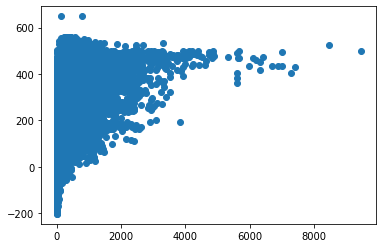

In [124]:
plt.scatter(y_test,y_pred)

## Random Forest

For continuous variables

Using the same dataset as the linear regression above:
    

In [143]:
y = np.array(df['volume_sold_(liters)'])
X = np.array(X)

In [144]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (357797, 170)
Training Labels Shape: (357797,)
Testing Features Shape: (119266, 170)
Testing Labels Shape: (119266,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [128]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [129]:
#what's the point of this scaling?

In [130]:
X_train_scaled.shape

(357797, 170)

In [131]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [132]:
predictions = rf.predict(X_test_scaled)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 69.61


In [133]:
feature_list = list(df.columns)

In [134]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: store_number         Importance: 0.28
Variable: initial claims       Importance: 0.22
Variable: week                 Importance: 0.2
Variable: tequila              Importance: 0.09
Variable: vodka                Importance: 0.09
Variable: DENISON              Importance: 0.02
Variable: gin                  Importance: 0.01
Variable: other                Importance: 0.01
Variable: TOLEDO               Importance: 0.01
Variable: JEFFERSON            Importance: 0.01
Variable: volume_sold_(liters) Importance: 0.0
Variable: amaretto             Importance: 0.0
Variable: bourbon              Importance: 0.0
Variable: brandy               Importance: 0.0
Variable: cocktail             Importance: 0.0
Variable: creme                Importance: 0.0
Variable: rum                  Importance: 0.0
Variable: scotch               Importance: 0.0
Variable: spirit               Importance: 0.0
Variable: whiskey              Importance: 0.0
Variable: ALBIA                Importance: 0.0
Vari

30


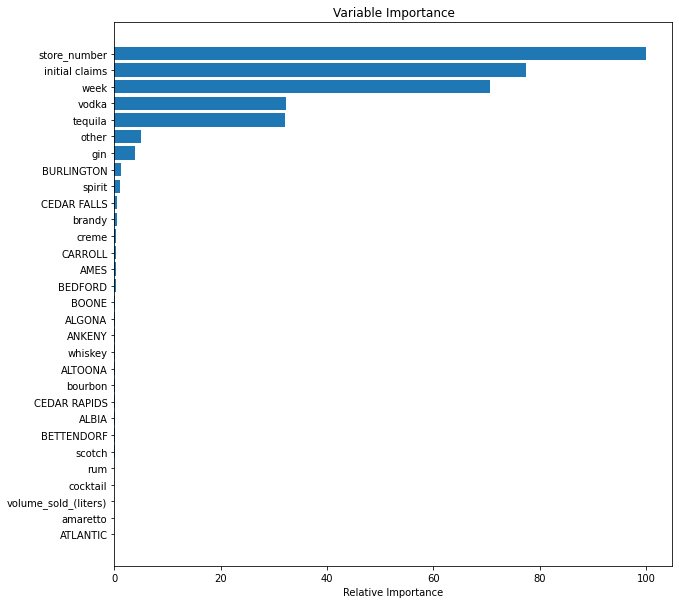

In [135]:
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Decision Tree


In [136]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = tree.DecisionTreeRegressor(random_state = 1234)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train_scaled, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test_scaled)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [138]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

57666.09366963259

In [139]:
np.mean(y_test)

124.97621736286956

In [140]:
from sklearn.metrics import r2_score

In [141]:
#same as above but scaled betweeen 0-1
r2_score(y_test, y_pred)

0.20031147575344

In [142]:
# Get numerical feature importances
importances = list(entr_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: store_number         Importance: 0.28
Variable: initial claims       Importance: 0.22
Variable: week                 Importance: 0.2
Variable: tequila              Importance: 0.09
Variable: vodka                Importance: 0.09
Variable: DENISON              Importance: 0.02
Variable: gin                  Importance: 0.01
Variable: other                Importance: 0.01
Variable: BURLINGTON           Importance: 0.01
Variable: TOLEDO               Importance: 0.01
Variable: JEFFERSON            Importance: 0.01
Variable: volume_sold_(liters) Importance: 0.0
Variable: amaretto             Importance: 0.0
Variable: bourbon              Importance: 0.0
Variable: brandy               Importance: 0.0
Variable: cocktail             Importance: 0.0
Variable: creme                Importance: 0.0
Variable: rum                  Importance: 0.0
Variable: scotch               Importance: 0.0
Variable: spirit               Importance: 0.0
Variable: whiskey              Importance: 0.0
Var